In [9]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import psutil
sys.path.insert(0, os.path.realpath('../'))

import LDAQ

In [2]:
from test_12_acquisition_bluetooth_PY import *

In [3]:
data = acquire(11)

Waiting for 11 seconds...
Connected: True


c:\LADISK\packages\LadiskDAQ\examples\test_12_acquisition_bluetooth_PY.py:28: FutureWarning: This method will be removed future version, use the services property instead.
  services = await client.get_services()


Disconnected: True
Ended


sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x1568a065120>


In [8]:
fs = data.shape[0] / 11
period_ms = 1/fs * 1000
period_ms

4.583333333333333

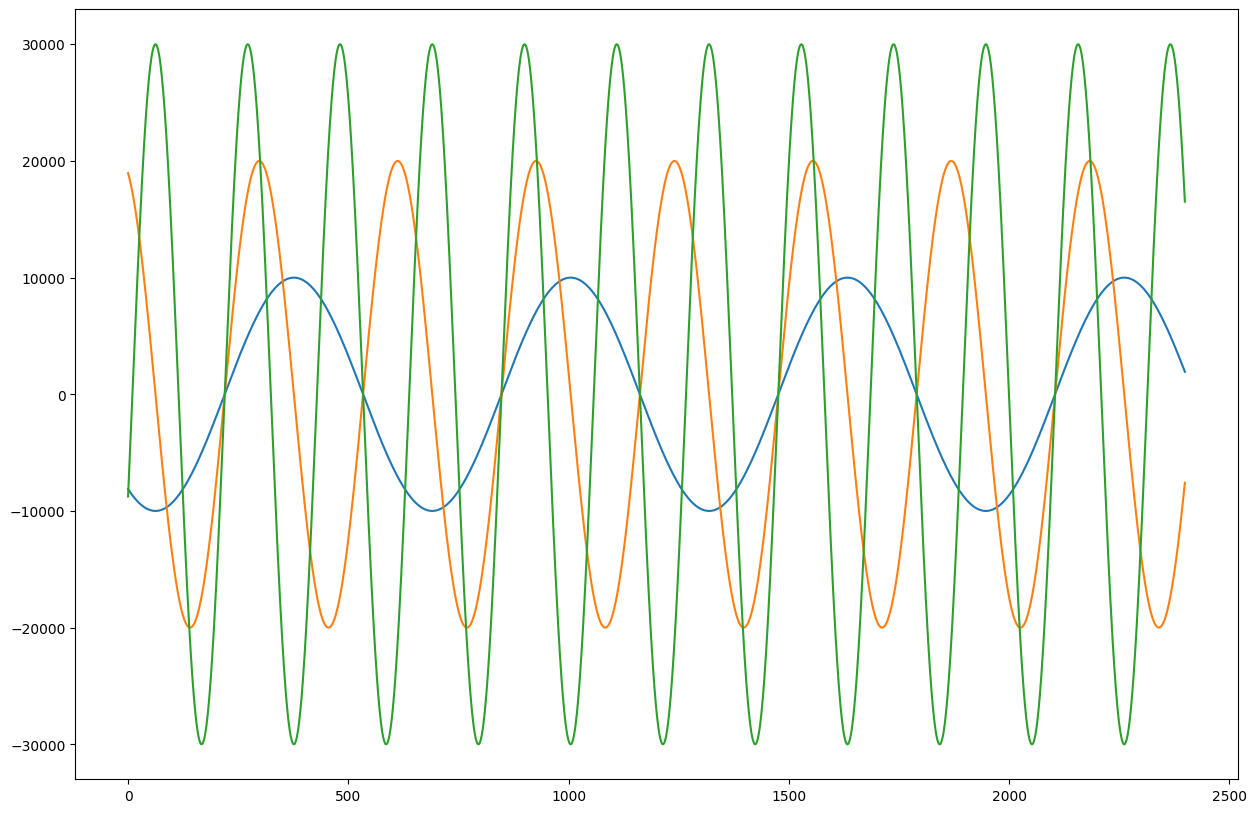

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(15, 10))
axs.plot(data)

In [2]:
# ------------------------------------------
# Create simulated data acquisition sources:
# ------------------------------------------
acq_simulated_data = LDAQ.simulator.SimulatedAcquisition(acquisition_name='PerformanceTracker')

In [3]:
# define simulated data using a function:
def retrieve_memory_and_cpu(t):
    """
    first argument must be time.
    If multi_processing is True, then the function must be pickable and 
    all libraries must be imported inside the function.
    """
    if t.shape[0] > 0:
        pid = psutil.Process(os.getpid())
        memory_usage = pid.memory_info().rss / 1024**2 # B
        cpu_usage    = pid.cpu_percent(interval=0.1)
                
        #memory_usage = 1
        data = np.array([memory_usage, cpu_usage] * t.shape[0] ).reshape((-1, 2))
    else:
        data = np.empty((0, 2))
    return data

In [4]:
# set simulated data (first argument is the function or array):
acq_simulated_data.set_simulated_data(retrieve_memory_and_cpu, channel_names=["memory", "CPU"], sample_rate=1., args=())

In [5]:
# ------------------------------------------
# create simulated video acquisition source:
# ------------------------------------------
acq_simulated_video = LDAQ.simulator.SimulatedAcquisition(acquisition_name='sim_video')

In [6]:
# define simulated video using numpy array:
fs = 30
simulated_video = np.random.randn(1000, 100, 100)

In [7]:
acq_simulated_video.set_simulated_video(simulated_video, channel_name_video='cam', sample_rate=fs) # use array

In [8]:
# ----------------------------
# Create visulaization object:
# ----------------------------

vis = LDAQ.Visualization(sequential_plot_updates=False)
vis.add_lines((0,0), source='PerformanceTracker', channels=["memory"], refresh_rate=1000, nth=1)
vis.add_lines((1,0), source='PerformanceTracker', channels=["CPU"],    refresh_rate=1000, nth=1)
vis.add_image(source="sim_video", channel="cam", refresh_rate=30)

vis.config_subplot((0,0), t_span=1000)
vis.config_subplot((1,0), t_span=1000)

In [9]:
ldaq = LDAQ.Core(acquisitions=[acq_simulated_data, acq_simulated_video], visualization=vis)
#ldaq = LDAQ.Core(acquisitions=[acq_simulated_video], visualization=vis)
#ldaq = LDAQ.Core(acquisitions=[acq_simulated_data], visualization=vis)
ldaq.run(3.)

In [ ]:
memory_usage = psutil.Process(os.getpid()).memory_info().rss / 1024**2 # B

In [ ]:
ldaq.get_measurement_dict()